## Benötigte Software



Der Zugriff auf Audio-Hardware bzw. Audio-Wiedergabe von Signalen funktioniert über
[https://python-sounddevice.readthedocs.io/en/0.3.15/installation.html](https://python-sounddevice.readthedocs.io/en/0.3.15/installation.html)



## Programmierbeispiel Requantisierung eines Audiosignals



Initialisiere Python



In [1]:
import numpy as np
import sounddevice as sd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

Audiosignal erzeugen:



In [2]:
f0 = 1000
f1 = 697
T0 = 1
Fs = 8000
t_N = np.arange(0, T0, 1/Fs)
x_N = 0.5*np.cos(2*np.pi*f0 * t_N)
#x_N += 0.5*np.cos(2*np.pi*f1 * t_N)

Audiosignal einlesen:



In [3]:
S_filename = "1Battle_Royal.wav"
[Fs, x_data] = wavfile.read(S_filename)
x_N = x_data[1:2*Fs,1]

/Users/jbatke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  





Max. Betrag/Anzahl benutzte Bits:



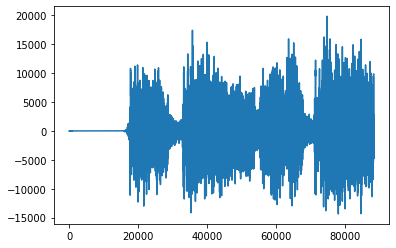

In [6]:
plt.plot(x_N)

In [1]:
x_max = np.max(np.abs(x_N))
len(np.binary_repr(x_max))

# Out [4]: 
# text/plain
15

### requantisieren



Normiere das Eingangssignal



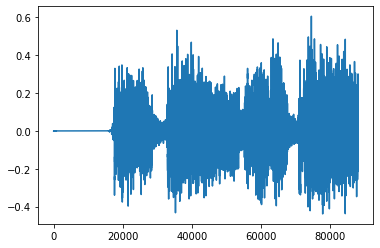

In [7]:
n_16b = 16
f_n = 2**(n_16b - 1)-1
x_n_N = x_N / f_n
plt.plot(x_n_N)

requantisieren:



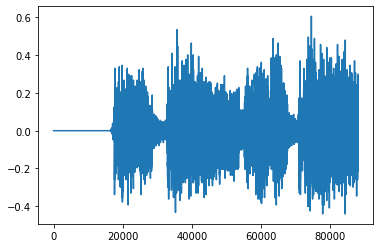

In [12]:
n_bit = 8
f_q = 2**(n_bit - 1)-1
x_q_N = np.round(f_q * x_n_N)/f_q
plt.plot(x_q_N)

### Ausgabe



In [13]:
sd.play(x_q_N, Fs)

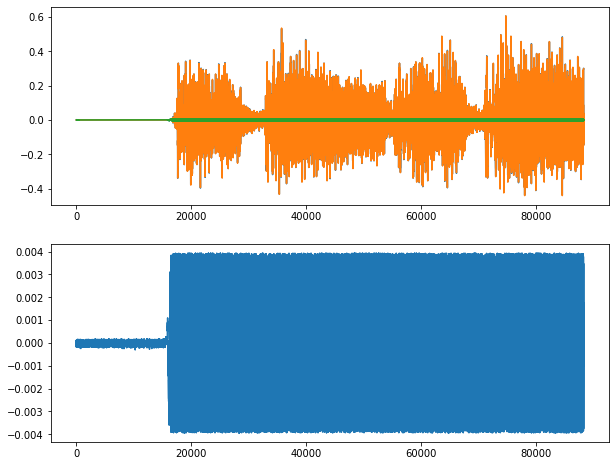

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(x_n_N)
ax[0].plot(x_q_N)
x_e_N = x_n_N - x_q_N
ax[0].plot(x_e_N)
ax[1].plot(x_e_N)

## Aufgabe



Stellen Sie den Quantisierungsfehler in einer geeigneten Darstellung im Plot dar!

